In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

# Import libraries for data processing to modelling

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Zwelious/DM_W2/refs/heads/main/breast-cancer.csv')
df.sample(n=10)

# Import Dataset
# random 10 rows of the data.

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
163,8712064,B,12.340,22.22,79.85,464.5,0.10120,0.10150,0.05370,0.02822,...,13.58,28.68,87.36,553.0,0.1452,0.23380,0.16880,0.08194,0.2268,0.09082
549,923465,B,10.820,24.21,68.89,361.6,0.08192,0.06602,0.01548,0.00816,...,13.03,31.45,83.90,505.6,0.1204,0.16330,0.06194,0.03264,0.3059,0.07626
417,90602302,M,15.500,21.08,102.90,803.1,0.11200,0.15710,0.15220,0.08481,...,23.17,27.65,157.10,1748.0,0.1517,0.40020,0.42110,0.21340,0.3003,0.10480
155,8711003,B,12.250,17.94,78.27,460.3,0.08654,0.06679,0.03885,0.02331,...,13.59,25.22,86.60,564.2,0.1217,0.17880,0.19430,0.08211,0.3113,0.08132
520,917092,B,9.295,13.90,59.96,257.8,0.13710,0.12250,0.03332,0.02421,...,10.57,17.84,67.84,326.6,0.1850,0.20970,0.09996,0.07262,0.3681,0.08982
174,871642,B,10.660,15.15,67.49,349.6,0.08792,0.04302,0.00000,0.00000,...,11.54,19.20,73.20,408.3,0.1076,0.06791,0.00000,0.00000,0.2710,0.06164
281,8912055,B,11.740,14.02,74.24,427.3,0.07813,0.04340,0.02245,0.02763,...,13.31,18.26,84.70,533.7,0.1036,0.08500,0.06735,0.08290,0.3101,0.06688
74,8610175,B,12.310,16.52,79.19,470.9,0.09172,0.06829,0.03372,0.02272,...,14.11,23.21,89.71,611.1,0.1176,0.18430,0.17030,0.08660,0.2618,0.07609
531,91903901,B,11.670,20.02,75.21,416.2,0.10160,0.09453,0.04200,0.02157,...,13.35,28.81,87.00,550.6,0.1550,0.29640,0.27580,0.08120,0.3206,0.08950
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.20500,0.40000,0.16250,0.2364,0.07678


In [ ]:
df.info()
# displays a concise summary of a DataFrame, including data types, non-null values, and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
print(df['diagnosis'].value_counts(dropna=False))

# Unique values count for categorical column (column "diagnosis")
# B stands for Benign or non-cancerous, while M stands for Malignant (cancerous)

diagnosis
B    357
M    212
Name: count, dtype: int64


In [ ]:
df.isnull().sum()
# show null in every column

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


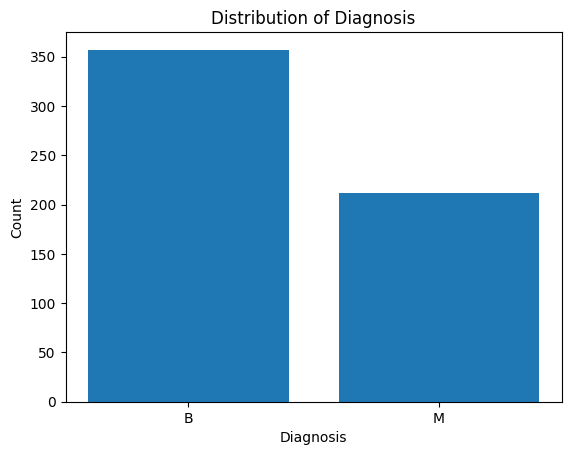

In [ ]:
# Count the occurrences of each unique value in the 'diagnosis' column.
diagnosis_counts = df['diagnosis'].value_counts()

# Create the bar chart.
plt.bar(diagnosis_counts.index, diagnosis_counts.values)

# Set the title and labels.
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')

# Display the chart.
plt.show()

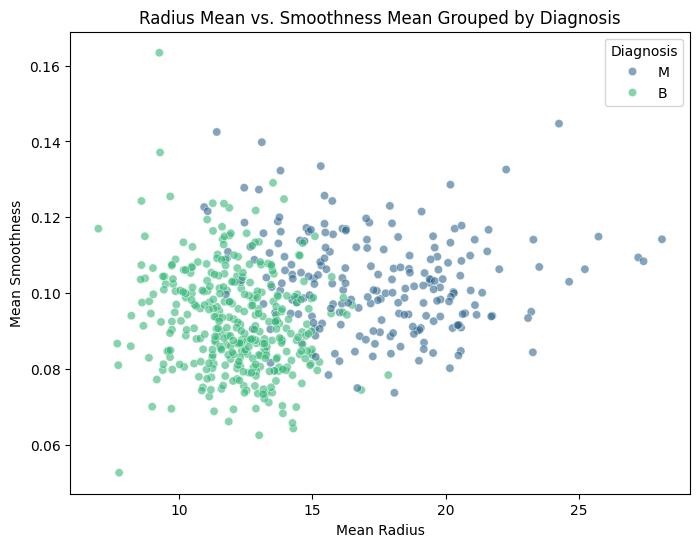

In [13]:
# Set up the plot with a specified size
plt.figure(figsize=(8, 6))

# Create a scatter plot for 'radius_mean' vs. 'smoothness_mean' with color differentiation by 'diagnosis'
sns.scatterplot(data=df, x='radius_mean', y='smoothness_mean', hue='diagnosis', palette='viridis', alpha=0.6)
plt.title('Radius Mean vs. Smoothness Mean Grouped by Diagnosis')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Smoothness')

# Display a legend with 'Diagnosis' as the title
plt.legend(title='Diagnosis')
plt.show()


In [14]:
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])
df.sample(n = 5)
# to convert categorical data into numerical labels.

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
556,924964,0,10.160,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,...,10.65,22.88,67.88,347.3,0.12650,0.1200,0.01005,0.02232,0.2262,0.06742
298,892214,0,14.260,18.17,91.22,633.1,0.06576,0.05220,0.024750,0.01374,...,16.22,25.26,105.80,819.7,0.09445,0.2167,0.15650,0.07530,0.2636,0.07676
84,8612080,0,12.000,15.65,76.95,443.3,0.09723,0.07165,0.041510,0.01863,...,13.67,24.90,87.78,567.9,0.13770,0.2003,0.22670,0.07632,0.3379,0.07924
110,864033,0,9.777,16.99,62.50,290.2,0.10370,0.08404,0.043340,0.01778,...,11.05,21.47,71.68,367.0,0.14670,0.1765,0.13000,0.05334,0.2533,0.08468
135,868202,1,12.770,22.47,81.72,506.3,0.09055,0.05761,0.047110,0.02704,...,14.49,33.37,92.04,653.6,0.14190,0.1523,0.21770,0.09331,0.2829,0.08067


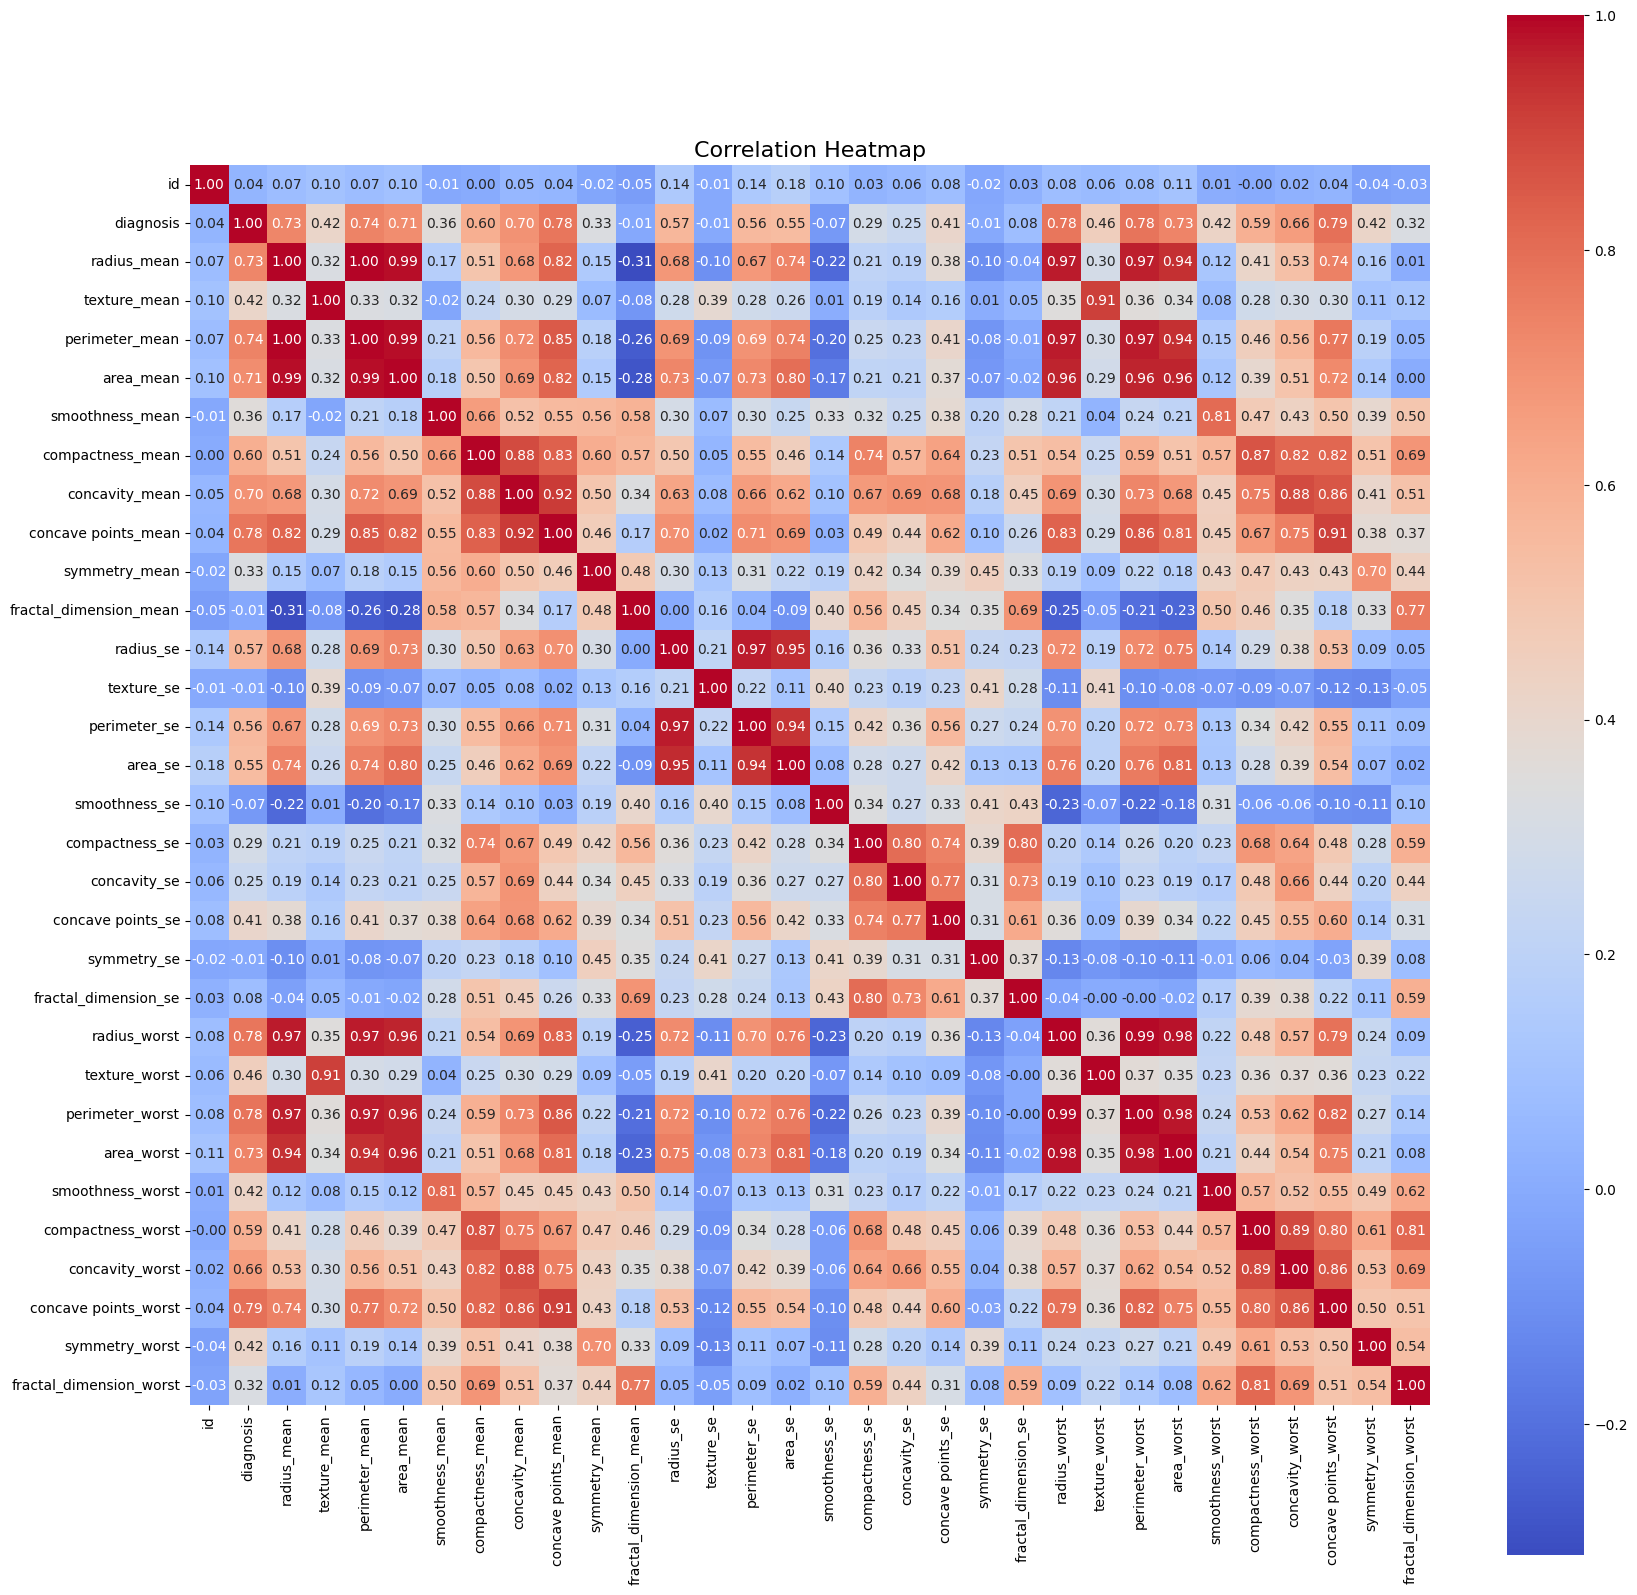

In [15]:
correlation_matrix = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()
#This heatmap visualizes the correlation between various features, showing strong positive correlations (in dark red)
# primarily between features related to size and texture metrics, while highlighting negative or weaker correlations (in blue)
# among other feature combinations. The clear groupings of strong correlations suggest clusters of related characteristics within the dataset,
# which could be insightful for feature selection and interpretation in a predictive model.

In [16]:
X = df.drop(['diagnosis', 'id'], axis = 1)
y = df['diagnosis']
# declare the target variable

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# divide the dataset into 80% train data (for training the model), and 20% testing data.

In [18]:
X_train.shape, X_test.shape
# To verify each train and test data is true to 80-20 division.

((455, 30), (114, 30))

In [19]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth = 3, random_state = 0)
clf_en.fit(X_train, y_train)

# Criterion Entropy.

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [20]:
y_pred_en = clf_en.predict(X_test)

# Predicting the X_test using Criterion Entropy.

In [21]:
print('Model accuracy score with criterion entropy: {0:0.4f}'.format(accuracy_score(y_test, y_pred_en)))

# Showing the accuracy score


Model accuracy score with criterion entropy: 0.9561


In [22]:
y_train_en = clf_en.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred_en)
training_accuracy = accuracy_score(y_train, y_train_en)

print('Testing accuracy: {0:0.4f}'.format(test_accuracy))
print('Training accuracy: {0:0.4f}'.format(training_accuracy))


Testing accuracy: 0.9561
Training accuracy: 0.9802


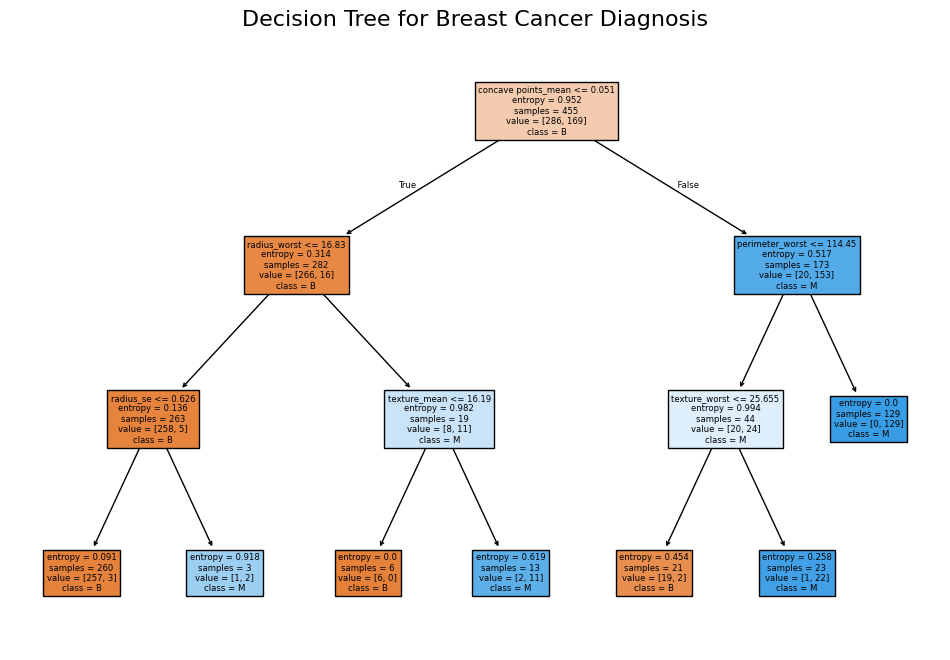

In [23]:
from sklearn import tree

plt.figure(figsize=(12, 8))
tree.plot_tree(clf_en, feature_names=X.columns, class_names=["B", "M"], filled=True)
plt.title('Decision Tree for Breast Cancer Diagnosis', fontsize=16)
plt.show()



In [24]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth = 3, random_state = 0)
clf_gini.fit(X_train, y_train)

# Decision Tree Modelling using Criterion Gini.

DecisionTreeClassifier(max_depth=3, random_state=0)

In [25]:
y_pred_gini = clf_gini.predict(X_test)

# Predicting the X_test using Criterion Gini.


In [26]:
print('Model accuracy score with criterion gini: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))

# Showing the accuracy score based on the y_test and y_pred


Model accuracy score with criterion gini: 0.9386


In [27]:
y_train_gini = clf_gini.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred_gini)
training_accuracy = accuracy_score(y_train, y_train_gini)

print('Testing accuracy: {0:0.4f}'.format(test_accuracy))
print('Training accuracy: {0:0.4f}'.format(training_accuracy))

Testing accuracy: 0.9386
Training accuracy: 0.9780


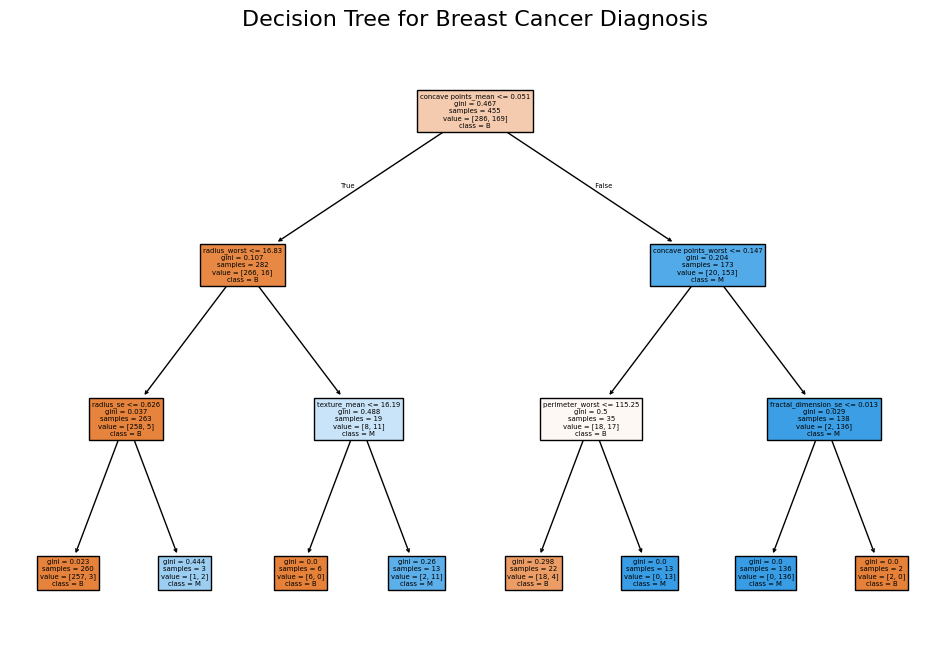

In [28]:
plt.figure(figsize=(12, 8))
tree.plot_tree(clf_gini, feature_names=X.columns, class_names=['B', 'M'], filled=True)
plt.title('Decision Tree for Breast Cancer Diagnosis', fontsize=16)
plt.show()

In [29]:
conf_matrix_en = confusion_matrix(y_test, y_pred_en)
conf_matrix_gini = confusion_matrix(y_test, y_pred_gini)

print("Confusion Matrix Entropy:\n", conf_matrix_en)
print("Confusion Matrix Gini Index:\n", conf_matrix_gini)

Confusion Matrix Entropy:
 [[70  1]
 [ 4 39]]
Confusion Matrix Gini Index:
 [[68  3]
 [ 4 39]]


In [30]:
nb = GaussianNB()
nb.fit(X_train, y_train)

# Modelling using Naive Bayes Classifier.

GaussianNB()

In [31]:
y_pred_nb = nb.predict(X_test)

# Predicting the X_test using the Naive Bayes Classifier model.

In [32]:
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Model accuracy score: {accuracy_nb:.4f}")

# Showing the accuracy score based on the y_test and y_pred

Model accuracy score: 0.9737


In [33]:
y_train_nb = nb.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred_nb)
training_accuracy = accuracy_score(y_train, y_train_nb)

print('Testing accuracy: {0:0.4f}'.format(test_accuracy))
print('Training accuracy: {0:0.4f}'.format(training_accuracy))

Testing accuracy: 0.9737
Training accuracy: 0.9363


In [34]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

# Modelling and fitting using random forest classifier, with estimators of 100 times.

RandomForestClassifier(random_state=42)

In [35]:

y_pred_rf = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rf)

print(f'Accuracy: {accuracy}')

# Showing the accuracy score based on the y_test and y_pred

Accuracy: 0.9649122807017544


In [36]:
y_train_rf = nb.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred_rf)
training_accuracy = accuracy_score(y_train, y_train_rf)

print('Testing accuracy: {0:0.4f}'.format(test_accuracy))

Testing accuracy: 0.9649


In [37]:
cm_en = confusion_matrix(y_test, y_pred_en)
cm_gini = confusion_matrix(y_test, y_pred_gini)
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("Confusion Matrix Entropy:")
print(cm_en)
print("\nConfusion Matrix Gini:")
print(cm_gini)
print("\nConfusion Matrix Naive Bayes:")
print(cm_nb)
print("\nConfusion Matrix Random Forest:")
print(cm_rf)


# Confusion matrix of each models

Confusion Matrix Entropy:
[[70  1]
 [ 4 39]]

Confusion Matrix Gini:
[[68  3]
 [ 4 39]]

Confusion Matrix Naive Bayes:
[[71  0]
 [ 3 40]]

Confusion Matrix Random Forest:
[[70  1]
 [ 3 40]]


In [38]:
class_report_en = classification_report(y_test, y_pred_en)
class_report_gini = classification_report(y_test, y_pred_gini)
class_report_nb = classification_report(y_test, y_pred_nb)
class_report_rf = classification_report(y_test, y_pred_rf)

print("Classification Report Entropy: \n", class_report_en)
print("Classification Report Gini Index: \n", class_report_gini)
print("Classification Report Naive Bayes: \n", class_report_nb)
print("Classification Report Random Forest: \n", class_report_rf)



Classification Report Entropy: 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Classification Report Gini Index: 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95        71
           1       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114

Classification Report Naive Bayes: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.9

In [ ]:
# All four models are really good at predicting breast cancer diagnosis. Naive Bayes might be slightly better,
# but it's not a huge difference. All models can predict both benign and malignant cases well. You can use any of the models in the future,
# but it's a good idea to compare them on new data to see which one performs best in specific situations. The data used for training the models seems
#to be comprehensive enough for accurate predictions.